# Pendat UTS

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64

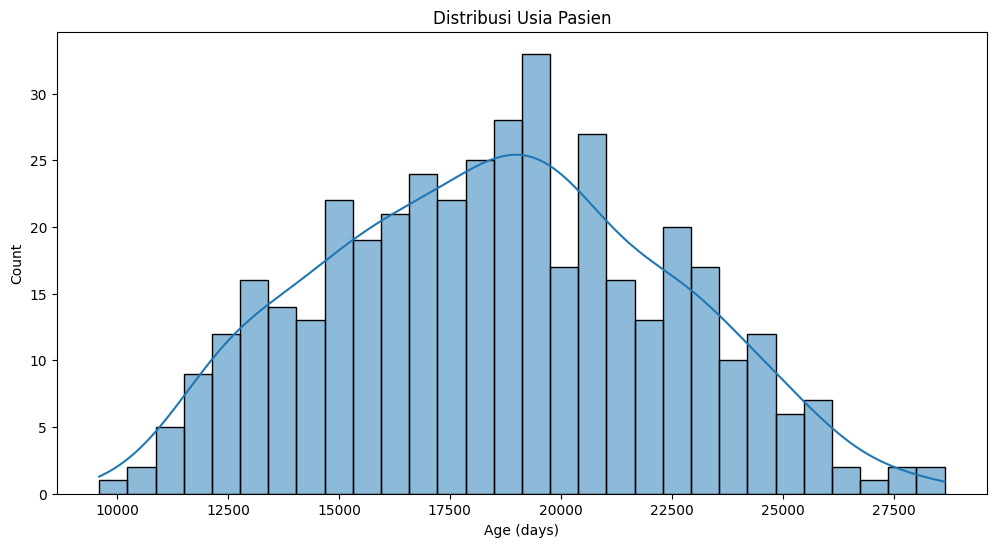

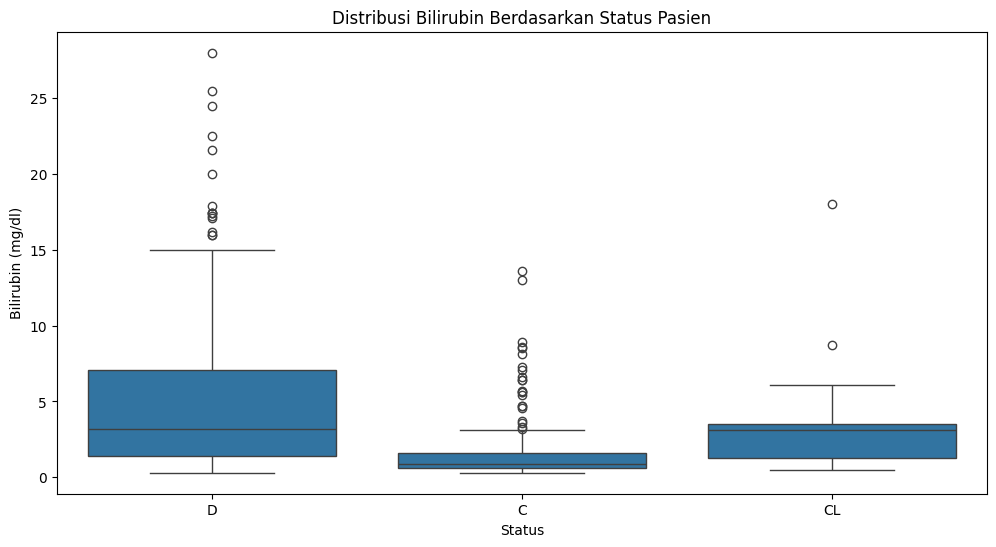

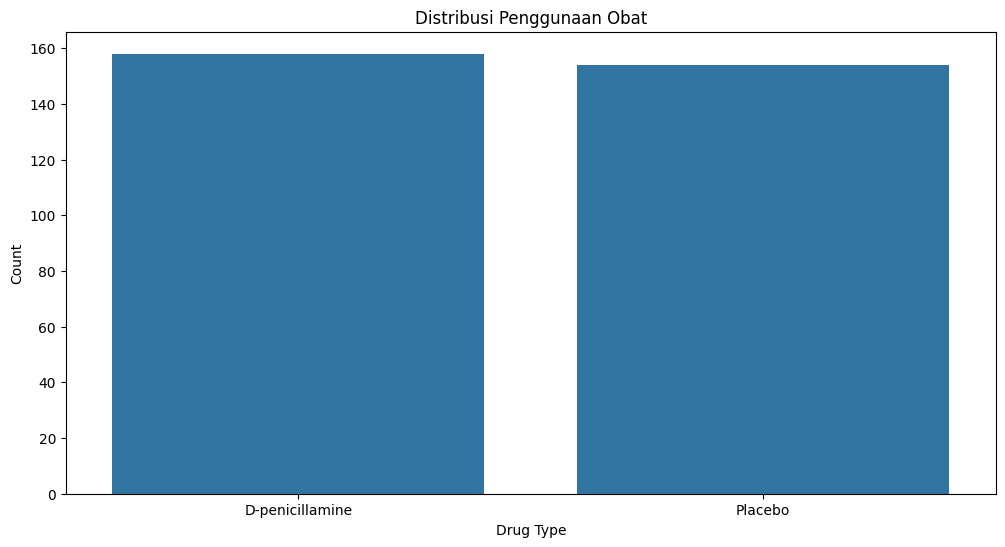

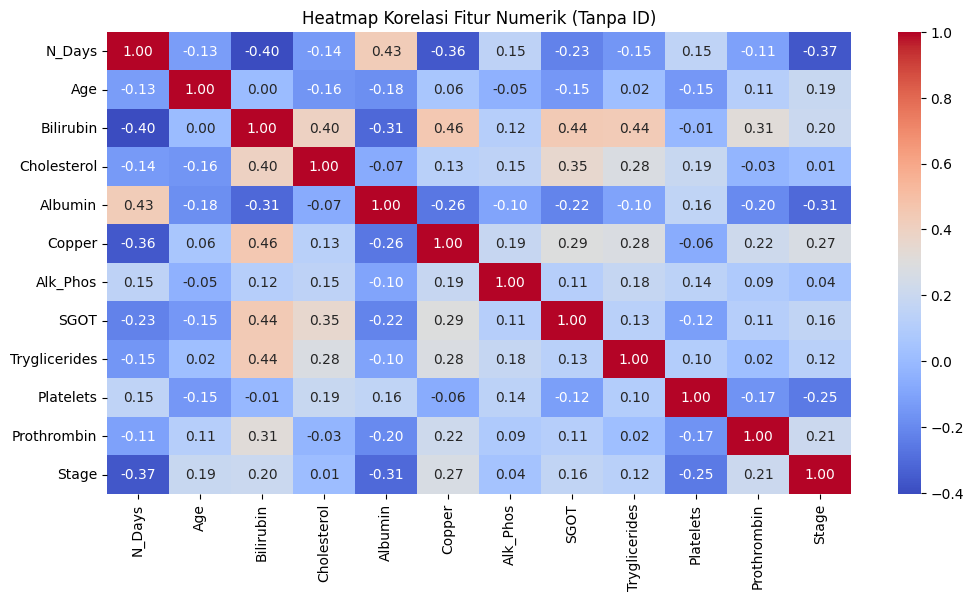

In [ ]:
# Mengimpor library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load dataset dari Google Drive
file_path = "/content/drive/MyDrive/PendatUTS/cirrhosis.csv"  # Pastikan path benar
df = pd.read_csv(file_path)

# --- Tampilkan Informasi Dataset ---
print("Informasi Dataset:")
print(df.info())

# # --- Contoh Data ---
# print("\nContoh Data:")
# print(df.head())

# --- Statistik Deskriptif untuk Kolom Numerik ---
print("\nStatistik Deskriptif:")
print(df.describe())

# --- Cek jumlah nilai yang hilang ---
print("\nJumlah Missing Values per Kolom:")
print(df.isnull().sum())

# --- Visualisasi Distribusi Usia ---
plt.figure(figsize=(12,6))
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Distribusi Usia Pasien")
plt.xlabel("Age (days)")
plt.ylabel("Count")
plt.show()

# --- Visualisasi Bilirubin Berdasarkan Status Pasien ---
plt.figure(figsize=(12,6))
sns.boxplot(x=df["Status"], y=df["Bilirubin"])
plt.title("Distribusi Bilirubin Berdasarkan Status Pasien")
plt.xlabel("Status")
plt.ylabel("Bilirubin (mg/dl)")
plt.show()

# --- Visualisasi Distribusi Penggunaan Obat ---
plt.figure(figsize=(12,6))
sns.countplot(x=df["Drug"])
plt.title("Distribusi Penggunaan Obat")
plt.xlabel("Drug Type")
plt.ylabel("Count")
plt.show()

# --- Perbaiki Heatmap Korelasi dengan Hanya Kolom Numerik ---
# Pilih hanya kolom numerik dan hilangkan kolom ID
numeric_df = df.select_dtypes(include=[np.number]).drop(columns=["ID"], errors="ignore")

# Visualisasi Heatmap Korelasi
plt.figure(figsize=(12,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Fitur Numerik (Tanpa ID)")
plt.show()


Kode ini bertujuan untuk melakukan **eksplorasi awal dataset Cirrhosis** menggunakan Python di **Google Colab**, dengan akses data dari **Google Drive**. Pertama, dilakukan **mount Google Drive** agar file CSV yang tersimpan bisa diakses secara langsung.

 Dataset kemudian dibaca menggunakan **pandas** dan informasi dasar seperti jumlah baris, tipe data, dan jumlah missing values diperiksa menggunakan `df.info()` dan `df.isnull().sum()`. Selanjutnya, dilakukan **analisis statistik deskriptif** untuk memahami distribusi data numerik menggunakan `df.describe()`.

  lalu kita melakukan **analisis korelasi** antara fitur-fitur numerik dengan menggunakan **heatmap**, setelah memastikan bahwa hanya kolom numerik yang digunakan (tanpa `ID`).
  
  Visualisasi ini membantu memahami pola dalam data sebelum dilakukan **tahapan preprocessing dan modeling**


## **Data Preparation**

In [ ]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from google.colab import drive

# Mount Google Drive untuk mengakses file
drive.mount('/content/drive')

# Load dataset dari Google Drive
file_path = "/content/drive/MyDrive/PendatUTS/cirrhosis.csv"
df = pd.read_csv(file_path)

# --- 1. Drop Rows dengan Nilai NA di Kolom 'Drug' ---
df_cleaned = df.dropna(subset=["Drug"]).copy()
# --- 2. Impute Missing Values dengan Mean ---
for col in df_cleaned.select_dtypes(include=[np.number]).columns:  # Hanya kolom numerik
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mean())

# --- 3. Deteksi Outlier dengan LOF ---
# Pilih hanya fitur numerik untuk LOF, tanpa ID
numeric_df = df_cleaned.select_dtypes(include=[np.number]).drop(columns=["ID"], errors="ignore")

# Inisialisasi model LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)  # 5% data dianggap outlier
outlier_predictions = lof.fit_predict(numeric_df)

# Tambahkan hasil deteksi outlier ke dataframe
df_cleaned["Outlier"] = outlier_predictions  # -1 berarti outlier, 1 berarti normal

# Hapus baris yang terdeteksi sebagai outlier
df_final = df_cleaned[df_cleaned["Outlier"] == 1].drop(columns=["Outlier"])

# --- Cek hasil preprocessing ---
print("\nJumlah data setelah preprocessing:", df_final.shape[0])
print("\nJumlah missing values setelah imputasi:")
print(df_final.isnull().sum())

print(df_final.to_string(index=False))

# Simpan dataset yang telah dibersihkan ke Google Drive
output_path = "/content/drive/MyDrive/PendatUTS/cirrhosis_cleaned.csv"
df_final.to_csv(output_path, index=False)
print(f"\nDataset bersih telah disimpan di: {output_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Jumlah data setelah preprocessing: 296

Jumlah missing values setelah imputasi:
ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64
 ID  N_Days Status            Drug   Age Sex Ascites Hepatomegaly Spiders Edema  Bilirubin  Cholesterol  Albumin     Copper  Alk_Phos   SGOT  Tryglicerides  Platelets  Prothrombin  Stage
  1     400      D D-penicillamine 21464   F       Y            Y       Y     Y       14.5   261.000000     2.60 156.000000    1718.0 137.95     172.000000 190.000000         12.2    4.0
  2    4500      C D-pe

Kode ini bertujuan untuk melakukan **preprocessing dan deteksi outlier** pada dataset **Cirrhosis** menggunakan **Google Colab**. Pertama,  untuk memuatnya ke dalam dataframe `df`. Langkah awal preprocessing meliputi **menghapus baris dengan missing values pada kolom `Drug`** menggunakan `dropna()`
, karena kolom ini penting dalam analisis. Kemudian, dilakukan **imputasi missing values** dengan **nilai rata-rata** pada semua kolom numerik, memastikan tidak ada nilai kosong yang dapat memengaruhi model. Setelah data dibersihkan, dilakukan **deteksi outlier menggunakan Local Outlier Factor (LOF)** dengan parameter `n_neighbors=20` dan `contamination=0.05`, yang menetapkan bahwa 5% data dianggap sebagai outlier. Hasil LOF ditambahkan sebagai kolom `"Outlier"`, dengan nilai `-1` menunjukkan outlier dan `1` menunjukkan data normal. Baris dengan outlier dihapus untuk memastikan dataset lebih bersih sebelum digunakan dalam pemodelan. Akhirnya, jumlah data setelah preprocessing serta jumlah missing values setelah imputasi ditampilkan, dan dataset hasil preprocessing disimpan ke Google Drive sebagai **cirrhosis_cleaned.csv**, siap digunakan untuk tahap selanjutnya seperti pemodelan klasifikasi


## Data Modelling

Sebelum melakukan data modelling kita masih melakukan preprocessing one hot encoding untuk fitur kategorical, saya tidak melakukan ini di kode sebelum nya untuk alasan kemudahan membaca kode dan membaca dataset bersih di file lain

setelah dataset sudah kita encoding kita lakukan KNN Classification untuk melihat kemungkinan


Akurasi Model KNN: 66.67%

Laporan Klasifikasi:
              precision    recall  f1-score   support

           C       0.67      0.89      0.77        35
          CL       0.00      0.00      0.00         4
           D       0.69      0.43      0.53        21

    accuracy                           0.67        60
   macro avg       0.46      0.44      0.43        60
weighted avg       0.64      0.67      0.63        60



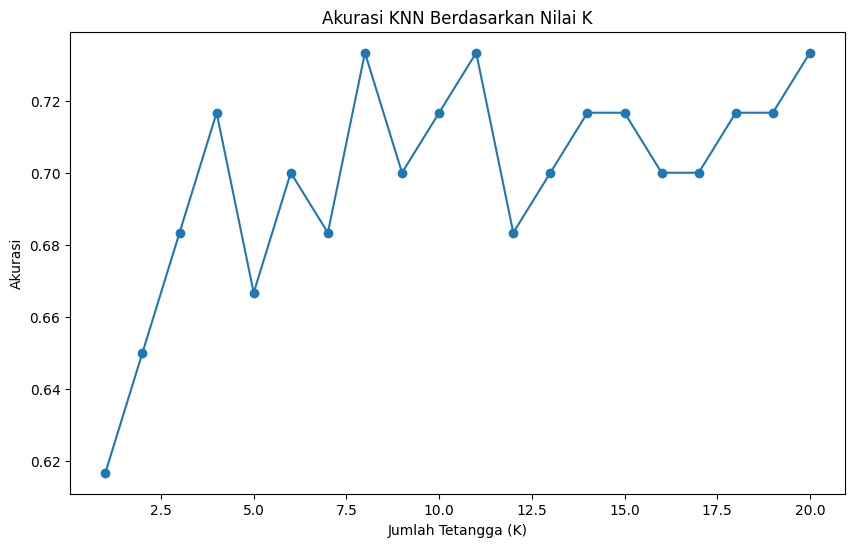

In [ ]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset dari Google Drive
file_path = "/content/drive/MyDrive/PendatUTS/cirrhosis_cleaned.csv"
df = pd.read_csv(file_path)

# --- 1. Preprocessing Data ---
# Pisahkan fitur dan target
X = df.drop(columns=["ID", "Status"])  # ID dihapus karena hanya identitas
y = df["Status"]

# Encoding fitur kategori
categorical_cols = ["Drug", "Sex", "Ascites", "Hepatomegaly", "Spiders", "Edema"]
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Normalisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 2. Split Data Training & Testing ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- 3. Model Klasifikasi dengan KNN ---
k = 5  # Pilih jumlah tetangga
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = model.predict(X_test)

# --- 4. Evaluasi Model ---
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model KNN: {accuracy * 100:.2f}%")
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))

# --- 5. Visualisasi Akurasi Berdasarkan Jumlah Tetangga ---
neighbors_range = range(1, 21)
accuracy_scores = []

for k in neighbors_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred_k = model.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred_k))

plt.figure(figsize=(10,6))
plt.plot(neighbors_range, accuracy_scores, marker='o', linestyle='-')
plt.xlabel("Jumlah Tetangga (K)")
plt.ylabel("Akurasi")
plt.title("Akurasi KNN Berdasarkan Nilai K")
plt.show()


## Hasil Prediksi

In [ ]:
# Buat dataframe hasil prediksi
df_test = pd.DataFrame(X_test, columns=X.columns)  # Gunakan X_test yang sudah diproses
df_test["Actual Survival State"] = y_test.values   # Masukkan label asli
df_test["Predicted Survival State"] = y_pred      # Masukkan hasil prediksi dari model KNN

# Tampilkan hasil prediksi survival pasien dengan fitur utama
print("\nHasil Prediksi Survival Pasien:")
print(df_test[["Age", "Bilirubin", "Albumin", "Stage", "Actual Survival State", "Predicted Survival State"]])
# print(df_test[["Age", "Bilirubin", "Albumin", "Stage", "Actual Survival State", "Predicted Survival State"]].head(20))  # Tampilkan 20 data pertama



Hasil Prediksi Survival Pasien:
         Age  Bilirubin   Albumin     Stage Actual Survival State  \
0   1.515027  -0.413713  0.123544 -0.054696                     C   
1  -0.138255  -0.457062  0.218837 -0.054696                     C   
2  -2.025928  -0.500410  0.600011 -2.367549                     C   
3  -0.120747  -0.500410  0.433247 -0.054696                     C   
4  -1.433809  -0.500410  0.099720 -0.054696                     C   
5   1.951669   2.013795 -1.853797  1.101731                     D   
6   1.053823  -0.543758  0.719128  1.101731                     D   
7   0.676236   1.125153 -1.282036  1.101731                     C   
8   0.249523  -0.478736 -0.352924 -0.054696                     C   
9   1.755951  -0.261994  0.909715 -1.211122                     D   
10  0.323211  -0.652129  1.338536 -0.054696                     D   
11  0.843733  -0.218646 -0.400571 -1.211122                     D   
12  0.172699   1.103479  1.124126  1.101731                     D   
1